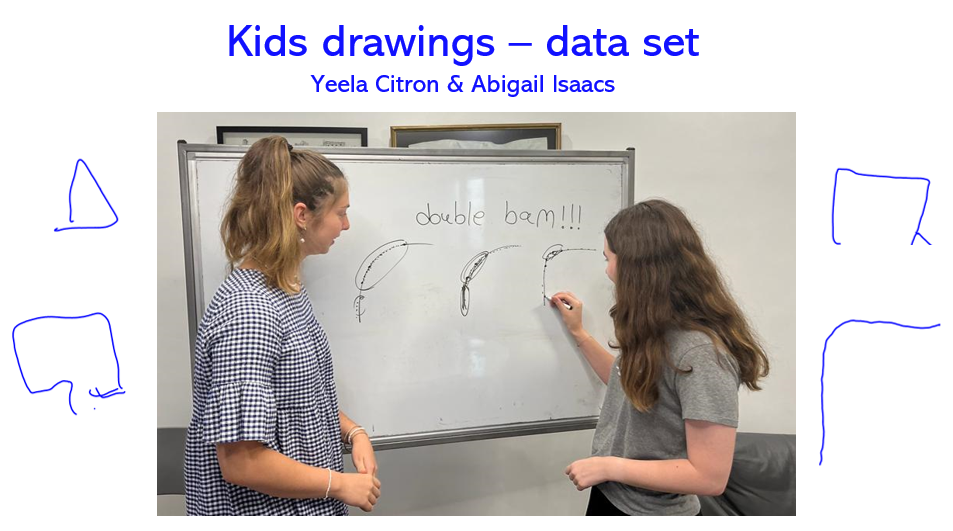

### In this project we received kids drawings and for each drawing we need to build and algorithem to figure out the following information:
- The number of times the child raised his hand from the drawing
- The number of lines in the drawing
- The length of each line and the average pressure the child apply on the page for each line
- Is the drawing is a close shape?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

### function for counting the number of hand lifts in the drawings

#### first we megerd the distans betweem every dot to the preves one
#### then we found the distance that is shurlly a hand lift
#### we notist that there is a difference between the presher of the pen when there is a hand lift therefor we took small distances and cheacked also the difference between the presher of the pen - these together is a strong enath fact for a hand lift

In [ ]:
pic4 = pd.read_csv(r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\פרוייקט גמר הדמיית נתונים\train\7563\SimpleTest\8.csv")
pic4 = pd.read_csv(r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\פרוייקט גמר הדמיית נתונים\train\7569\SimpleTest\6.csv")

pic4 = pd.read_csv(r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\פרוייקט גמר הדמיית נתונים\train\7570\SimpleTest\4.csv")


# Number of lifts

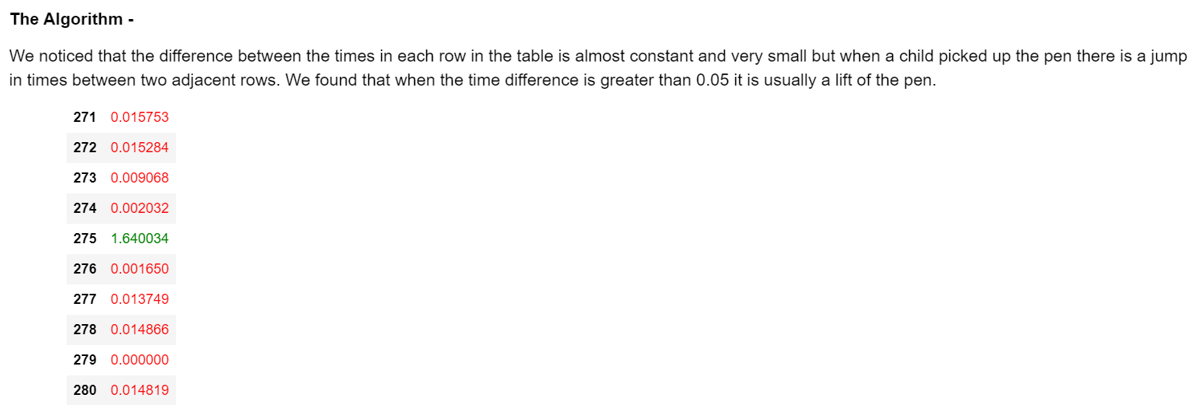

In [36]:
def numLift (pic):
    diffrence = makeDiff(pic)
    count = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            count = count+1
     
    return (count)

# Number of lines - first try

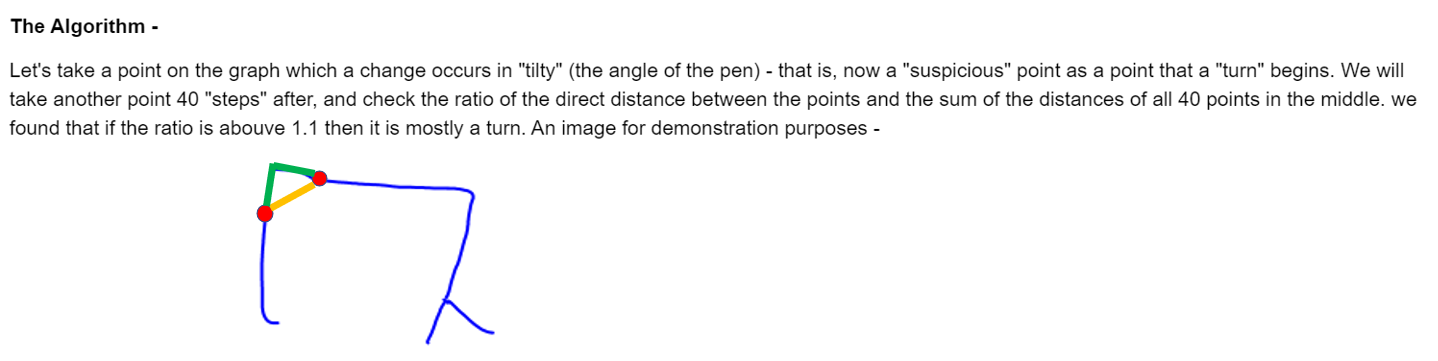

In [5]:
def numLiftToLine (pic):
    diffrence = makeDiff(pic)
    t =[0]
    counter = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
    fig, ax = plt.subplots()
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        drow(pict)
        add = countlines2(pict)
        counter = counter + add
    print ("number of lines - ") 
    print (counter)    

In [6]:
def countlines2 (pic):
    diffrence = makeDiff(pic)
    counter= 1
    i=0
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
       
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]
            if ((sumdis/d )>1.1): 
                counter = counter +1
                plt.scatter(pic['X'][math.ceil((i+end)/2)],pic[' Y'][math.ceil((end+i)/2)], s=15)
                i = i+39
        
        i = i+1 
            
         
    return (counter)

# Number of lines - second try

We saw that there is not always a change in "tilty" even though the child made a sharp turn so we tried a different algorithm -

We will take a point on the drawing and take two another points -  30 "steps" before and 30 "steps" after the point.
We calculate the direct distance between the points and the sum of the distances between all the points between them and we calculate the ratio.
If the ratio is abouve 1.25 we will mark this as a new line.

In [7]:
def numLiftToLine2 (pic):
    diffrence = makeDiff(pic)
    t =[0]
    counter = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
    fig, ax = plt.subplots()
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        drow(pict)
        add = countlines22(pict)
        counter = counter + add
    print ("number of lines - ") 
    print (counter)  

In [8]:
def countlines22 (pic):
    diffrence = makeDiff(pic)
    counter= 1
    i=30
    sumdis = 0
    
    while (i<pic.shape[0]-30):
        sumdis = 0
        d = 0
        x1 = pic['X'][i-30]
        y1 =pic[' Y'][i-30]
        x2 = pic['X'][i+30]
        y2 =pic[' Y'][i+30]
     
        p = [x1,y1]
        q = [x2,y2]
        d = math.dist(p, q)
        for j in range(i-30,i+30):
            sumdis = sumdis+ diffrence['distance'][j]
       
        if ((sumdis/d )>1.25): 
            counter = counter +1
            plt.scatter(pic['X'][i],pic[' Y'][i], s=15)
            i = i+59
        
        i = i+1 
            
         
    return (counter)

# Number of lines - combining the two algorithems from first and second trys

The idea -
If there is a change in "tilty" then do algorithm 1 and if not then do algorithm 2

In [9]:
def numLiftToLine3 (pic):
    diffrence = makeDiff(pic)
    t =[0]
    counter = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
    fig, ax = plt.subplots()
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        drow(pict)
        add = countlines3(pict)
        counter = counter + add
    print ("number of lines - ") 
    print (counter)

In [10]:
def countlines3 (pic):
    diffrence = makeDiff(pic)
    counter= 1
    i=30
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]         
                
            if ((sumdis/d )>1.1): 
                counter = counter +1
                plt.scatter(pic['X'][math.ceil((i+end)/2)],pic[' Y'][math.ceil((end+i)/2)], s=15)
                i = i+59
        else:
                sumdis = 0
                d = 0

                x1 = pic['X'][i-30]
                y1 =pic[' Y'][i-30]
                x2 = pic['X'][i+30]
                y2 =pic[' Y'][i+30]
     
                p = [x1,y1]
                q = [x2,y2]
                d = math.dist(p, q)
                for j in range(i-30,i+30):
                    sumdis = sumdis+ diffrence['distance'][j]
       
                if ((sumdis/d )>1.25): 
                    counter = counter +1
                    plt.scatter(pic['X'][i],pic[' Y'][i], s=15)
                    i = i+59

        
        i = i+1         
         
    return (counter)

# Length and pressure of the lines 

In [11]:
def LenLine (pic):
    diffrence = makeDiff(pic)
    t =[0]
    dis = []
    counter = 0
    presher = []
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
   
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        
        dis =dis+ countlines2LenLine(pict)
        presher = presher+ liftPresher(pict)
    
    print ("distances -")
    print (dis)  
    print ("pressures -")
    print (presher) 

In [12]:
def liftPresher (pic):
    iii = [0]
    presher = []
    diffrence = makeDiff(pic)
   
    i=30
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]         
                
            if ((sumdis/d )>1.1): 
                
                iii.append(math.ceil((i+end)/2))
                
                i = i+59
        else:
                sumdis = 0
                d = 0

                x1 = pic['X'][i-30]
                y1 =pic[' Y'][i-30]
                x2 = pic['X'][i+30]
                y2 =pic[' Y'][i+30]
     
                p = [x1,y1]
                q = [x2,y2]
                d = math.dist(p, q)
                for j in range(i-30,i+30):
                    sumdis = sumdis+ diffrence['distance'][j]
       
                if ((sumdis/d )>1.25): 
                    iii.append(i)
                   
                    i = i+59

        
        i = i+1         
            
    iii.append(pic.shape[0]-1) 
    for m in range(0,len(iii)-1):
        sumpresh=0
        counter =0
        for n in range(iii[m],iii[m+1]):
            sumpresh = sumpresh + pic[' Pressure'][n]
            counter = counter+1
        presher.append(sumpresh/counter)
    return (presher)

In [13]:
def countlines2LenLine (pic):
    
    iii = [0]
    line = []
    diffrence = makeDiff(pic)
   
    i=30
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]         
                
            if ((sumdis/d )>1.1): 
                
                iii.append(math.ceil((i+end)/2))
                
                i = i+59
        else:
                sumdis = 0
                d = 0

                x1 = pic['X'][i-30]
                y1 =pic[' Y'][i-30]
                x2 = pic['X'][i+30]
                y2 =pic[' Y'][i+30]
     
                p = [x1,y1]
                q = [x2,y2]
                d = math.dist(p, q)
                for j in range(i-30,i+30):
                    sumdis = sumdis+ diffrence['distance'][j]
       
                if ((sumdis/d )>1.25): 
                    iii.append(i)
                   
                    i = i+59

        
        i = i+1         
            
    iii.append(pic.shape[0]-1) 
    for m in range(0,len(iii)-1):
        x3 = pic['X'][iii[m]]
        y3 = pic[' Y'][iii[m]]
        
        x4 = pic['X'][iii[m+1]]
        y4 = pic[' Y'][iii[m+1]]
        p = [x3,y3]
        q = [x4,y4]
        d = math.dist(p, q)
        line.append(d)
    return (line)

# Checking if the drawing is a closed shape

The Algorithm -
For each point in the graph we will check each of the points that apear after it in the graph and check if exists:
- 1) The distance between the two points is less than 10.
- 2) The time difference between the two points is relatively large -
 if a child draws the whole drawing fast (less than 5 seconds) then the time difference we will examine can be no more than 1 second.
 And if the child draws slowly (more than 5 seconds) - then the time difference should be over 3 seconds.

If this happens then it is a sign that there is a cut between two lines.

In addition, we found that if the number of lifting in the child's drow +1 is smaller or equals to the number of cuts that we found drow is closed.

In [44]:
def isClosed (pic):
    if ((numLift(pic) +1) <= numOfCut(pic)):
        return True
    else:
        return False

In [45]:
def numOfCut (pic):
    
    if ((pic[' Time'][pic.shape[0]-1] - pic[' Time'][0])<5):
        sec = 1
    else:
        sec = 3
       
    counter = 0
    i=0
    while ( i < pic.shape[0]):
    
        x = pic['X'][i]
        y =pic[' Y'][i]
        
        for j in range(i+1,pic.shape[0]):
            x2 = pic['X'][j]
            y2 =pic[' Y'][j]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
            t1 = pic[' Time'][i]
            t2 = pic[' Time'][j]
            t = abs(t1-t2)
            t = float (t)
             
            if ((d<10) & (t>sec)):
                counter = counter + 1
                plt.scatter(pic['X'][i],pic[' Y'][i], s=30, color = 'black')
                i = i+29
                break
        i = i+1
    
    return (counter)

# Cleaning the data

In [28]:
def clean (pic):
    pic = pic.drop(pic.shape[0]-1)
    pic = pic.drop(pic.shape[0]-1)
    pic[' Time'] = pic[' Time'].replace(regex=[':'], value='')
    for i in range(0,pic.shape[0]):
        pic['X'][i] = float(pic['X'][i])
        pic[' Time'][i] = float(pic[' Time'][i])

    return pic

# Creating a table with the differences between the rows

In [17]:
def makeDiff(pic):
    times = []
    dis = []
    tiltx = []
    tilty = []
    Pressure = []
    for i in range(1,pic.shape[0]):
        time = pic[' Time'][i] - pic[' Time'][i-1]
        times.append(time)
        p = [pic['X'][i-1],pic[' Y'][i-1]]
        q = [pic['X'][i],pic[' Y'][i]]
        distance = math.dist(p, q)
        dis.append(distance)
        tx = abs(pic[' TiltX'][i] - pic[' TiltX'][i-1])
        ty = abs(pic[' TiltY'][i] - pic[' TiltY'][i-1])
        tiltx.append(tx)
        tilty.append(ty)
        pr = abs(pic[' Pressure'][i] - pic[' Pressure'][i-1])
        Pressure.append(pr)
    diffrence = pd.DataFrame({'time':times, 'distance':dis , 'tiltx':tiltx,'tilty':tilty, 'Pressure':Pressure })   
    return (diffrence)


In [18]:
def _color_red_or_green(val):
    color = 'red' if val < 0.05 else 'green'
    return 'color: %s' % color

# Ploting the image

In [19]:
def drow (pic4):
    
    
    plt.xlim([min(pic4['X'])-200,max(pic4['X'])+200])
    plt.ylim([min(pic4[' Y'])-200,max(pic4[' Y'])+200])

    plt.scatter(pic4['X'],pic4[' Y'], s=0.1)

    plt.show()

### We took the difference table and with the help of coloring the values according to different threshholds we could more easily understand the data and find changes that indicate on different things.
### For example:

In [20]:
makeDiff(pic4).style.applymap(_color_red_or_green)

NameError: name 'pic4' is not defined

# Let's check if our algorithems works:

### pic1-

In [25]:
pic1 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7569\SimpleTest\4.csv")

In [31]:
pic1 = clean(pic1)

In [37]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic1)))

The number of times the child raised his hand from the drawing: 1


<IPython.core.display.Javascript object>


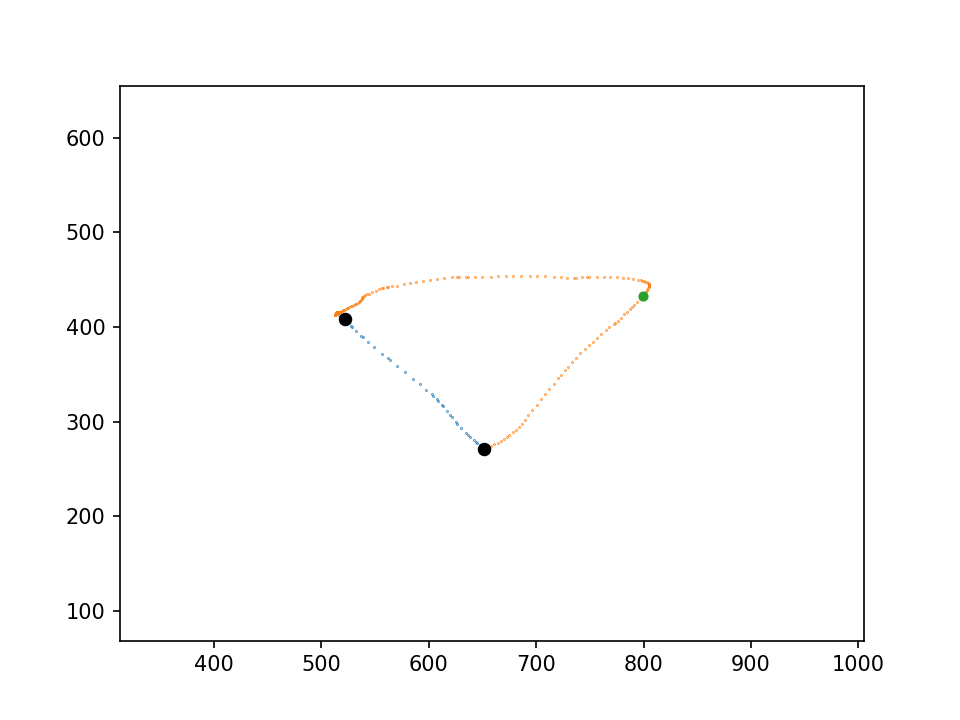

number of lines - 
3


In [40]:
numLiftToLine3(pic1) 

In [41]:
LenLine(pic1)

distances -
[199.0796729135374, 220.50075579518995, 287.3988580546401]
pressures -
[0.48793168501420453, 0.5942925347222222, 0.7791031125992064]


In [46]:
isClosed(pic1)

True

### pic2-

In [62]:
pic2 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7569\SimpleTest\6.csv")

In [63]:
pic2 = clean(pic2)

In [52]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic2)))

The number of times the child raised his hand from the drawing: 0


<IPython.core.display.Javascript object>


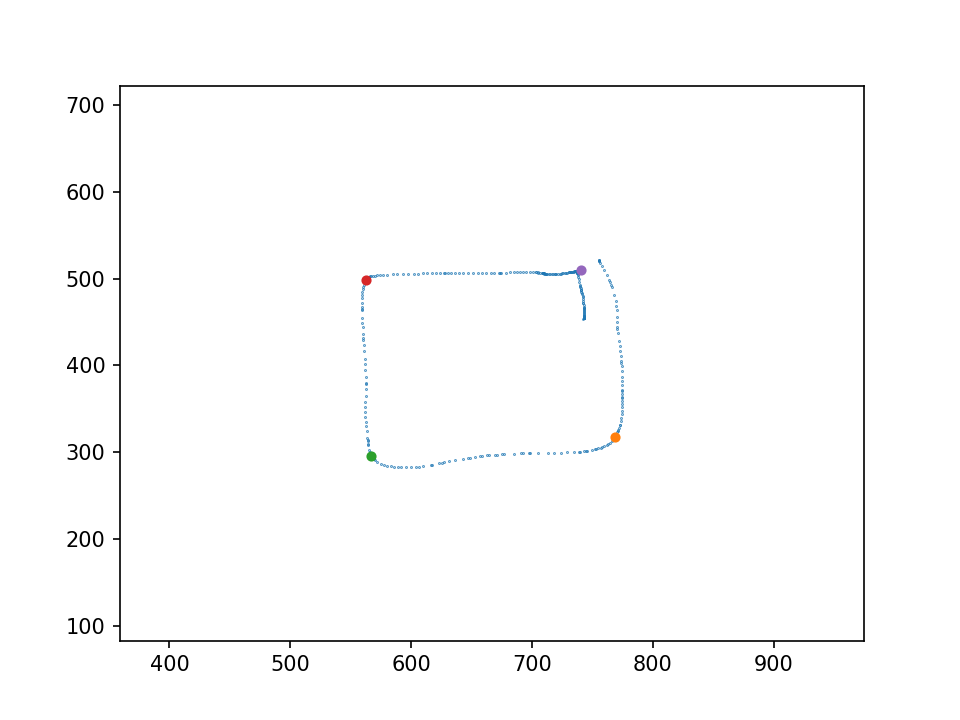

number of lines - 
5


In [53]:
numLiftToLine3(pic2) 

In [55]:
LenLine(pic2)

distances -
[204.11068359164835, 203.02173479704086, 203.09166518950153, 178.50578646861217, 56.02219979119418]
pressures -
[0.7054275811887255, 0.8138131806344697, 0.783203125, 0.7700828269675926, 0.7995231784119898]


In [56]:
isClosed(pic2)

False

### pic3-

In [66]:
pic3 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7573\SimpleTest\8.csv")

In [67]:
pic3 = clean(pic3)

In [68]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic3)))

The number of times the child raised his hand from the drawing: 1


### First try

<IPython.core.display.Javascript object>


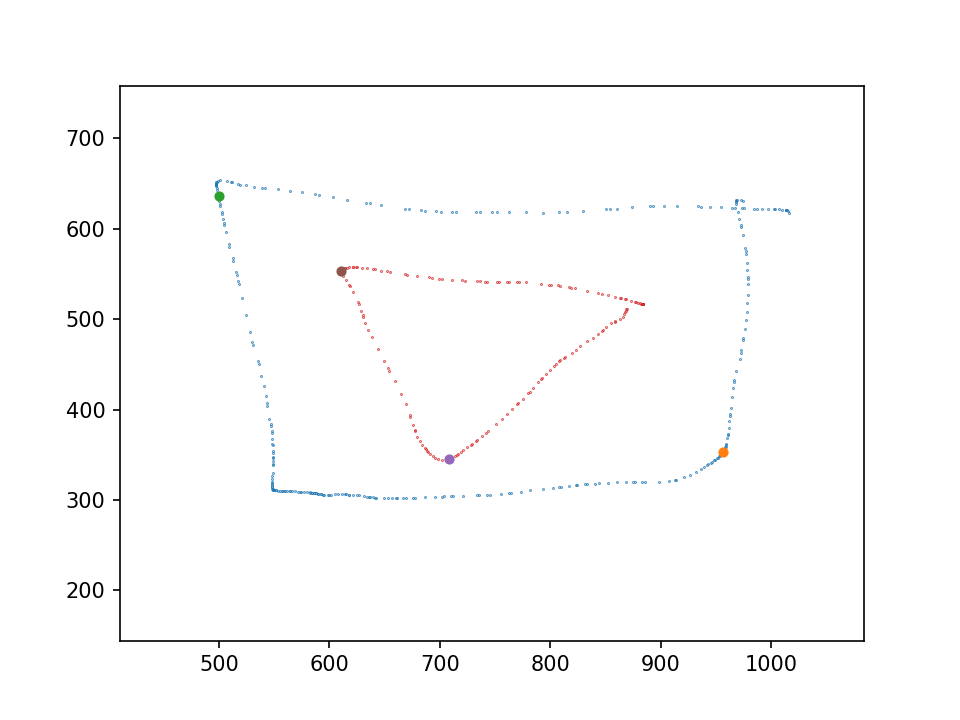

number of lines - 
6


In [69]:
numLiftToLine(pic3)

### Second try

<IPython.core.display.Javascript object>


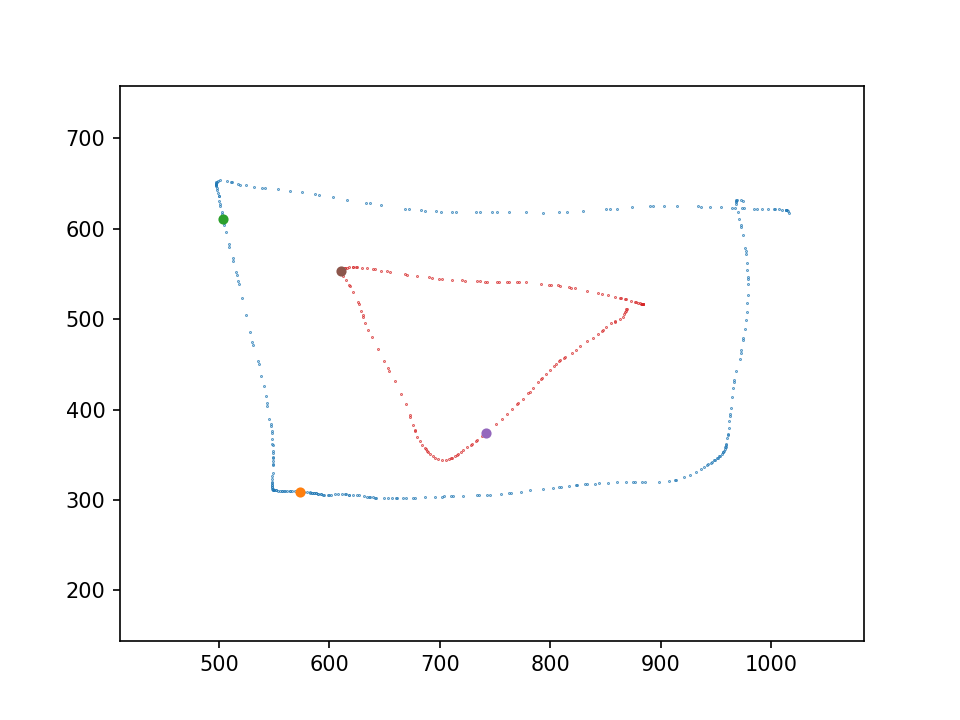

number of lines - 
6


In [70]:
numLiftToLine2(pic3)

### Combining the two algorithems from first and second trys

<IPython.core.display.Javascript object>


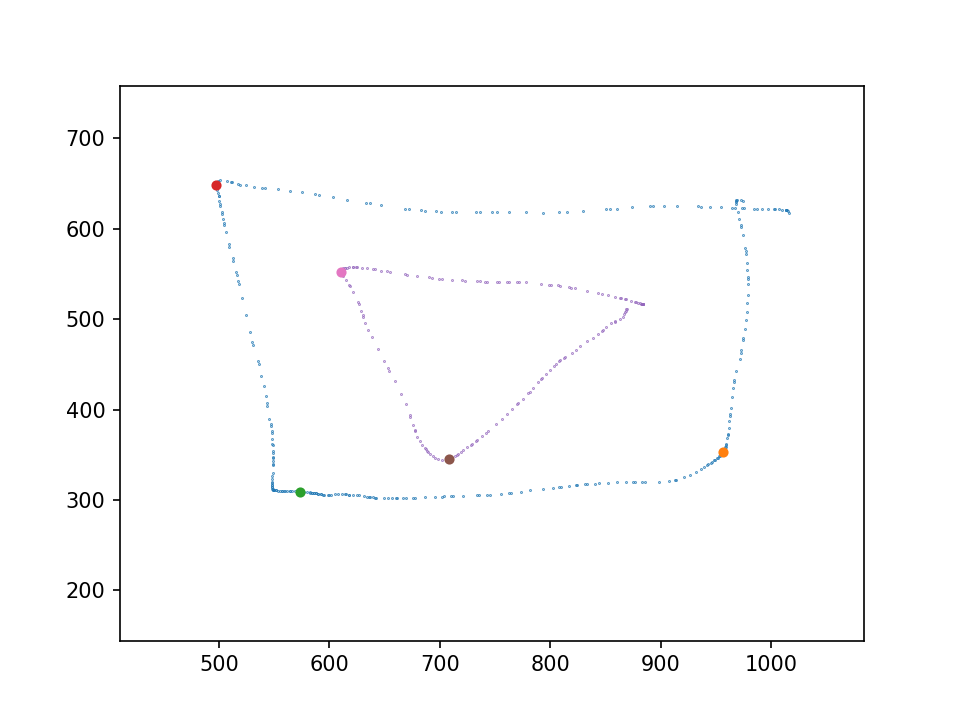

number of lines - 
7


In [74]:
numLiftToLine3(pic3) 

In [72]:
LenLine(pic3)

distances -
[278.5234119473226, 385.0856535032534, 348.23177828315727, 520.3846281364337, 231.60922554218345, 228.43932338685602, 276.09120655339814]
pressures -
[0.8075, 0.9696467937809405, 0.9714898003472222, 0.891819309543919, 0.7491832386363636, 0.83956298828125, 0.7828702059659091]


### pic4 -

In [75]:
pic4 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7570\SimpleTest\13.csv")

In [76]:
pic4 = clean(pic4)

In [77]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic4)))

The number of times the child raised his hand from the drawing: 3


<IPython.core.display.Javascript object>


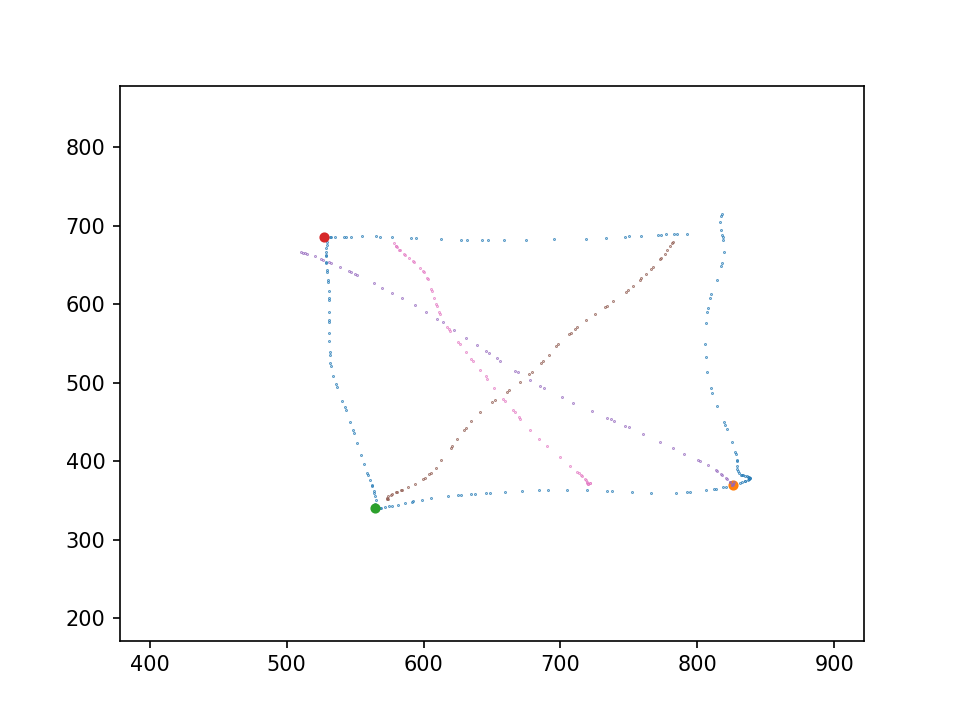

number of lines - 
7


In [78]:
numLiftToLine3(pic4) 

In [79]:
LenLine(pic4)

distances -
[344.9991601962399, 263.44519611534014, 347.5272670517303, 265.0829585243079, 432.2850523028113, 387.7722979654996, 336.9679688299191]
pressures -
[0.634423828125, 0.68929443359375, 0.6642986360143442, 0.6601443407012195, 0.3901847464139344, 0.5351359049479166, 0.5235402960526315]


### pic5 -

In [80]:
pic5 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7570\SimpleTest\5.csv")

In [81]:
pic5 = clean(pic5)

In [82]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic5)))

The number of times the child raised his hand from the drawing: 3


<IPython.core.display.Javascript object>


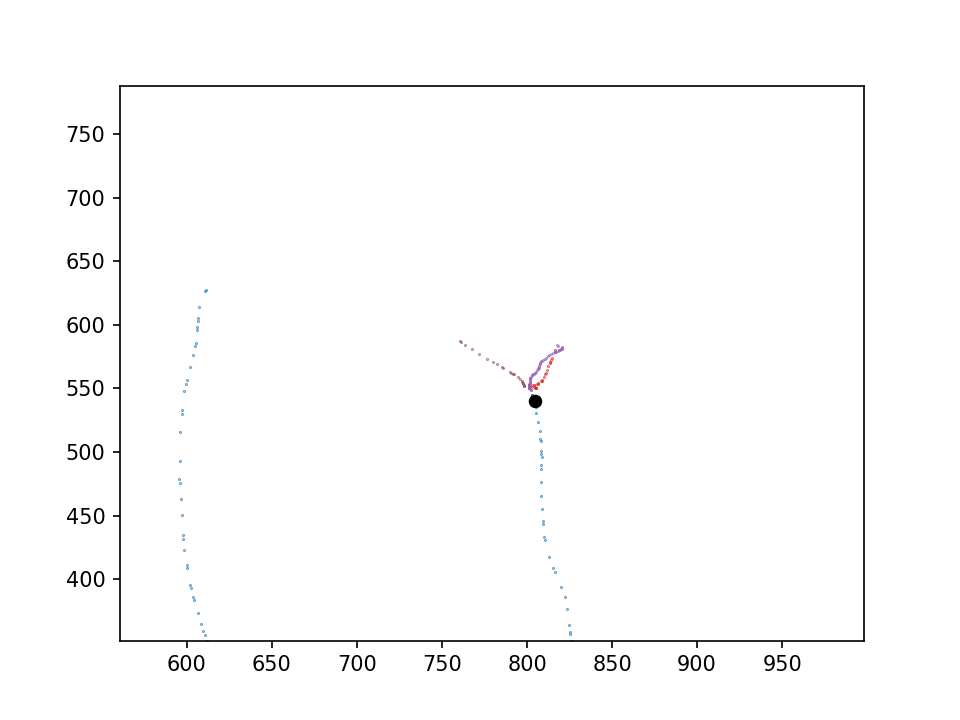

number of lines - 
6


In [84]:
numLiftToLine3(pic5) 

In [85]:
isClosed(pic5)

False

<IPython.core.display.Javascript object>


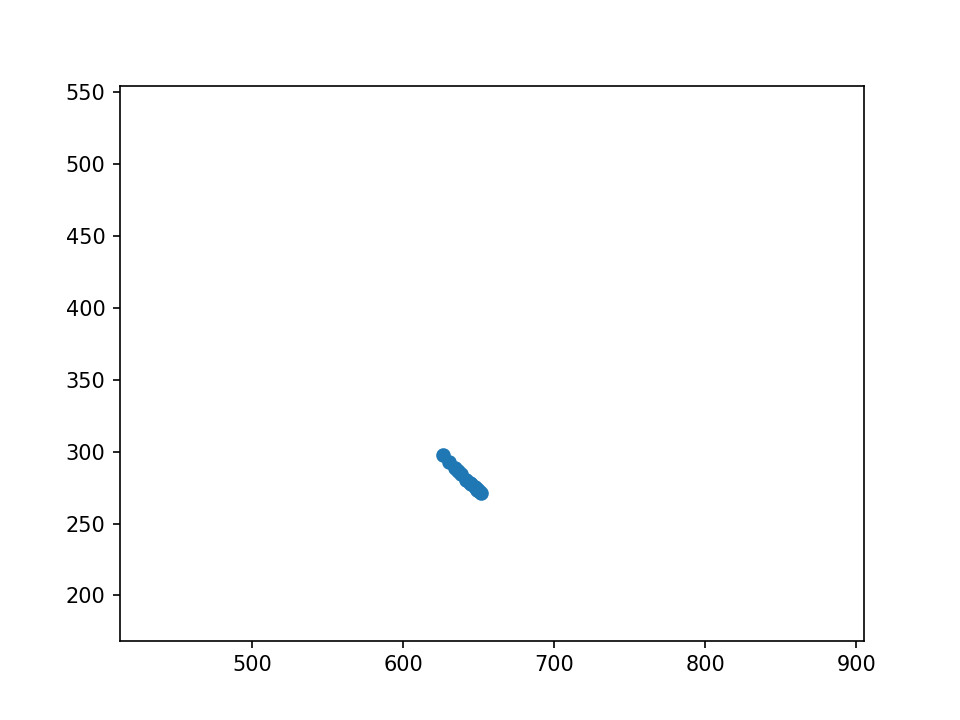

In [86]:
x = pic1['X']
y = pic1[' Y']

fig = plt.figure()
plt.xlim(pic1['X'].min()-100 , pic1['X'].max() + 100)
plt.ylim(pic1[' Y'].min()-100 , pic1[' Y'].max() + 100)

graph, = plt.plot([], [], 'o')

graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(pic1), interval=10)
plt.show()

<IPython.core.display.Javascript object>


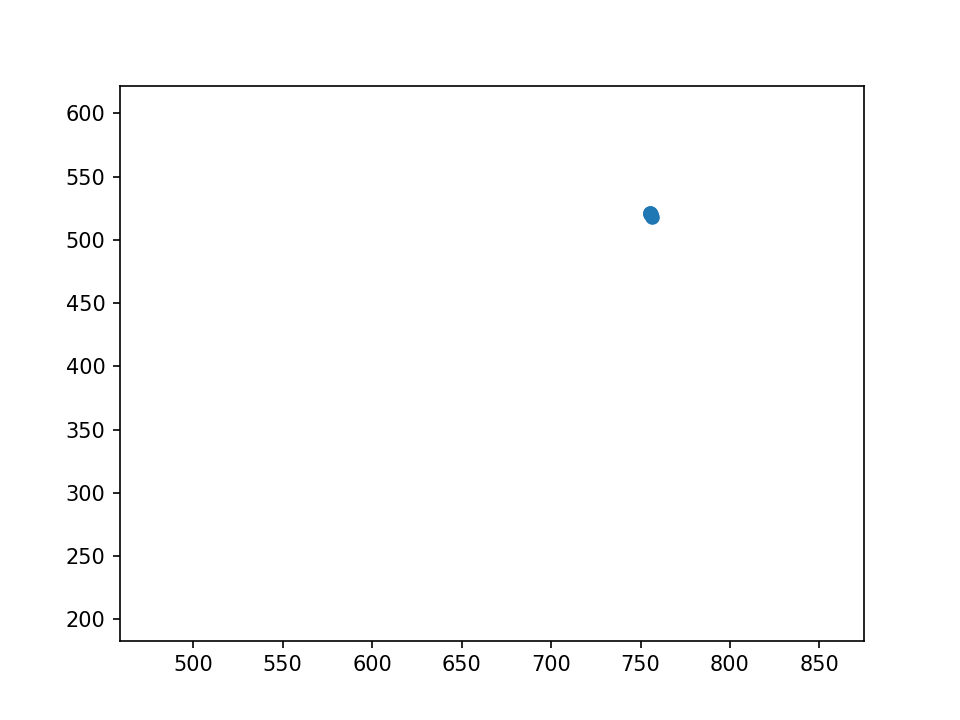

In [87]:
x = pic2['X']
y = pic2[' Y']

fig = plt.figure()
plt.xlim(pic2['X'].min()-100 , pic2['X'].max() + 100)
plt.ylim(pic2[' Y'].min()-100 , pic2[' Y'].max() + 100)

graph, = plt.plot([], [], 'o')

graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(pic2), interval=10)
plt.show()

<IPython.core.display.Javascript object>


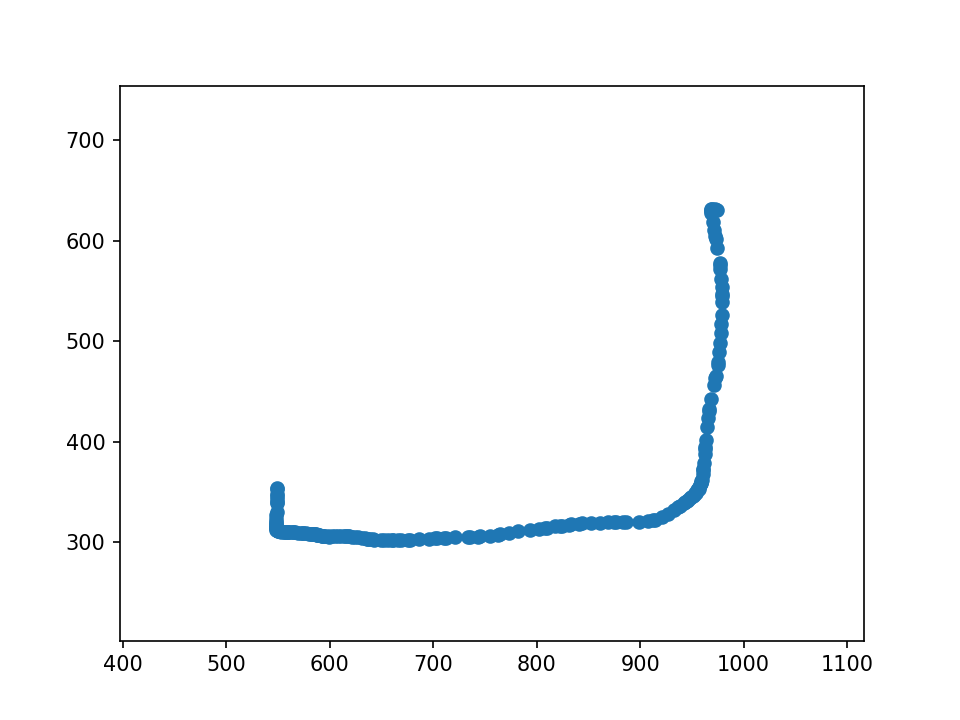

In [88]:
x = pic3['X']
y = pic3[' Y']

fig = plt.figure()
plt.xlim(pic3['X'].min()-100 , pic3['X'].max() + 100)
plt.ylim(pic3[' Y'].min()-100 , pic3[' Y'].max() + 100)

graph, = plt.plot([], [], 'o')

graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(pic3), interval=10)
plt.show()

<IPython.core.display.Javascript object>


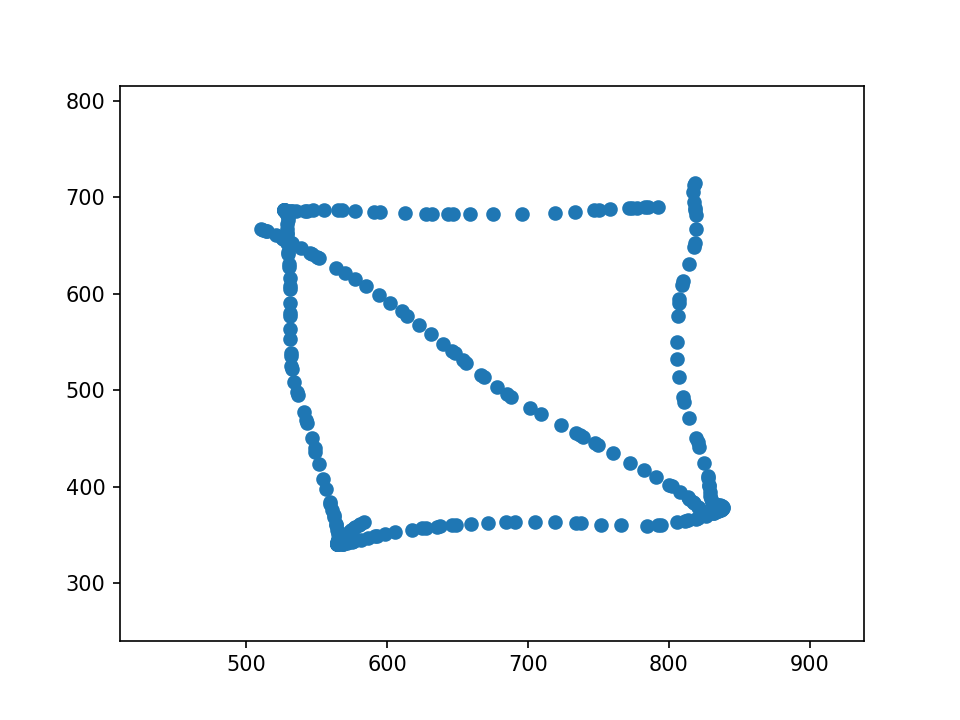

In [89]:
x = pic4['X']
y = pic4[' Y']

fig = plt.figure()
plt.xlim(pic4['X'].min()-100 , pic4['X'].max() + 100)
plt.ylim(pic4[' Y'].min()-100 , pic4[' Y'].max() + 100)

graph, = plt.plot([], [], 'o')

graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(pic4), interval=10)
plt.show()

<IPython.core.display.Javascript object>


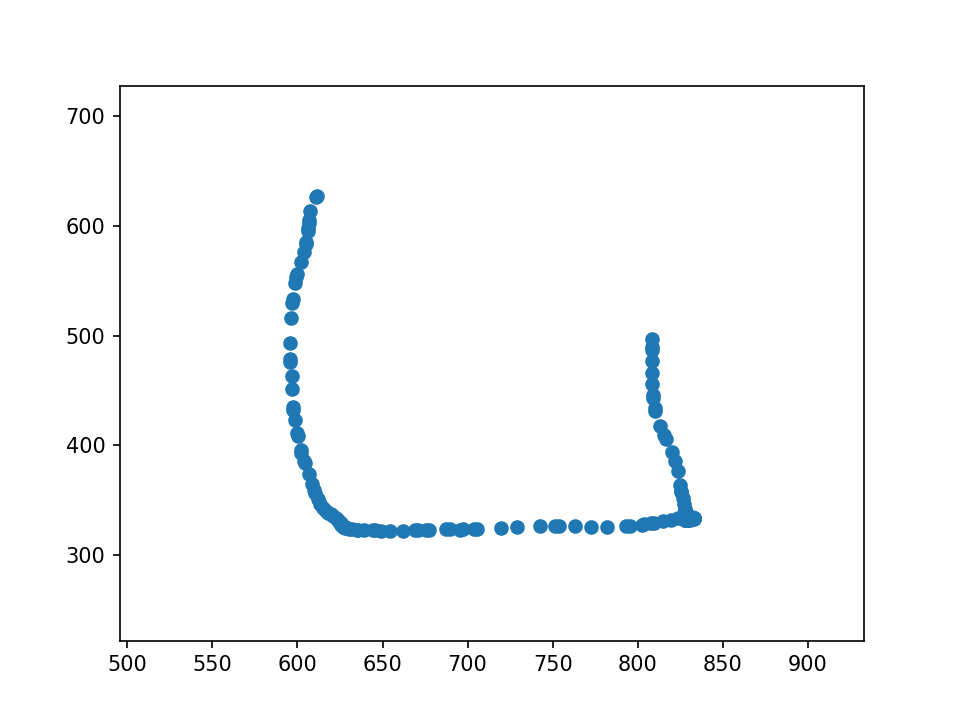

In [83]:
x = pic5['X']
y = pic5[' Y']

fig = plt.figure()
plt.xlim(pic5['X'].min()-100 , pic5['X'].max() + 100)
plt.ylim(pic5[' Y'].min()-100 , pic5[' Y'].max() + 100)

graph, = plt.plot([], [], 'o')

graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(pic5), interval=10)
plt.show()